### Univariate Plots

References:
[1](https://learning.oreilly.com/library/view/the-data-visualization/9781800568846/B15779_02_Final_SZ.xhtml#_idParaDest-108) [2](https://learning.oreilly.com/library/view/storytelling-with-data/9781119002253/c02.xhtml#c2_9)
- **Types of Plots: Histogram and Box and Whiskers Plot**
- **Data: Univariate continous**
- **Purpose: Study Statistical Properties**

In [1]:
import pandas as pd
weather = pd.read_csv("./weather.csv") #Daily weather observations for a few U.S. cities in 2020.
weather.head(2)

,date,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01-01,Atlanta,7.2,0.0,0.0,45.0,57.0,36.0
1,2020-01-01,Boston,15.4,0.0,0.0,39.0,43.0,36.0


In [2]:
weather['date'] = pd.to_datetime(weather['date'])
weather['month'] = weather['date'].dt.month

In [3]:
atlanta = weather.query("city=='Atlanta'")[['TMIN','TMAX']]

<AxesSubplot:>

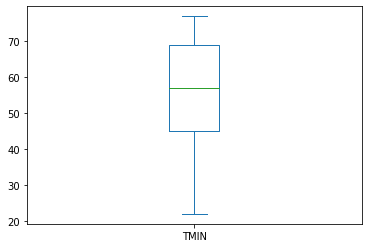

In [4]:
atlanta['TMIN'].plot(kind = 'box')

<AxesSubplot:>

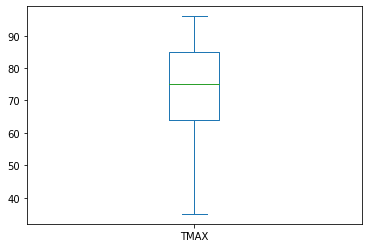

In [5]:
atlanta['TMAX'].plot(kind = 'box')

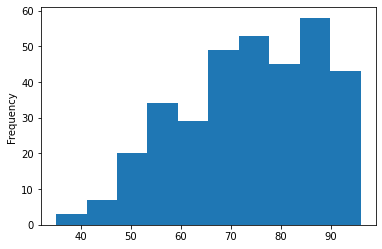

In [6]:
ax = atlanta['TMAX'].plot(kind = 'hist')

In [7]:
[x.get_xy() for x in ax.patches]

[(35.0, 0.0),
 (41.10000000000001, 0.0),
 (47.2, 0.0),
 (53.3, 0.0),
 (59.400000000000006, 0.0),
 (65.5, 0.0),
 (71.6, 0.0),
 (77.69999999999999, 0.0),
 (83.79999999999998, 0.0),
 (89.9, 0.0)]

In [8]:
ax.patches[0].get_xy()

(35.0, 0.0)

In [9]:
bins = [0,35.0,41.1,47.2,53.3,59.4,65.5,71.6,77.6,83.79,89.9]

In [10]:
atlanta['Temperature'] = pd.cut(atlanta['TMAX'],bins=bins)
atlanta.groupby('Temperature').agg({'TMAX':'size'}).reset_index().rename(columns={'TMAX':"Count"})

,Temperature,Count
0,"(0.0, 35.0]",1
1,"(35.0, 41.1]",2
2,"(41.1, 47.2]",7
3,"(47.2, 53.3]",20
4,"(53.3, 59.4]",34
5,"(59.4, 65.5]",29
6,"(65.5, 71.6]",49
7,"(71.6, 77.6]",53
8,"(77.6, 83.79]",45
9,"(83.79, 89.9]",58


In [20]:
atlanta['Temperature'].value_counts(normalize=True,ascending=True).round(3)

(0.0, 35.0]      0.003
(35.0, 41.1]     0.007
(41.1, 47.2]     0.023
(47.2, 53.3]     0.067
(59.4, 65.5]     0.097
(53.3, 59.4]     0.114
(77.6, 83.79]    0.151
(65.5, 71.6]     0.164
(71.6, 77.6]     0.178
(83.79, 89.9]    0.195
Name: Temperature, dtype: float64

<AxesSubplot:ylabel='Density'>

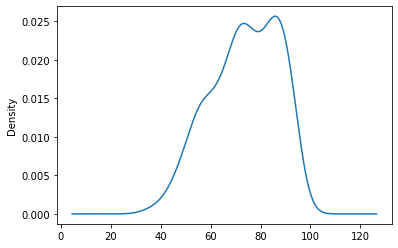

In [11]:
atlanta['TMAX'].plot(kind = 'density')

In [16]:
atlanta['TMAX'].quantile(0.5)

75.0